In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#dep info later
%matplotlib inline

In [35]:
df = pd.read_csv("cleandata.csv")
columns = list(df)
df['Position'] = pd.Categorical(df['Position'],
                                    categories=['Professor', 'Associate Professor', 'Assistant Professor', 'Lecturer',
                                                'Lab Lecturer'],
                                    ordered=True)
df["age_by_5"] = ((df["age"] -1)// 4) * 4+1
df["C"] = pd.to_numeric(df["C"], errors="coerce")
df["P"] = pd.to_numeric(df["P"], errors="coerce")
df["H"] = pd.to_numeric(df["H"], errors="coerce")
df["P5"] = pd.to_numeric(df["P5"], errors="coerce")
df["C5"] = pd.to_numeric(df["C5"], errors="coerce")
df["H5"] = pd.to_numeric(df["H5"], errors="coerce")
df["avgC"] = pd.to_numeric(df["avgC"], errors="coerce")
df["P5avg"] = df["P5"] /6
df["C5avg"] = df["C5"] /6
df["H5avg"] = df["H5"] /6

list_of_positions = ['Professor', 'Associate Professor', 'Assistant Professor', 'Lecturer', 'Lab Lecturer']
list_of_dept = df["Dept"].value_counts().index
df[["P","C","H","P5","C5","H5"]] = df[["P","C","H","P5","C5","H5"]].fillna(0)


In [36]:
#epistrefei dusdiastato pikana me to timeseries twn P h (C kai C<30000)

def meleti_timeseries(c_or_p):
    # gia meleti ana xrono
    if c_or_p=="P":
        start = "2021.1"
    else:
        start = "2021.2"
    filt = ((df["age"]>30)  & (df["C"]<30000))

    dfc = df[filt].loc[:,start:"1981.2":2]
# 

    for column in dfc:
        dfc[column] = pd.to_numeric(dfc[column], errors="coerce")
    
    np_arrayc = dfc.to_numpy()

    return np_arrayc

cit_array= meleti_timeseries("C")


In [37]:
#nan=>0
cit_array= np.nan_to_num(cit_array, copy=True, nan=0, posinf=None, neginf=None)


#centered moving average
cit_array_copy= cit_array.copy() 
for i in range(len(cit_array)):
    for j in range(1,len(cit_array[i])-1):
         cit_array[i][j]= (cit_array_copy[i][j-1] + cit_array_copy[i][j] + cit_array_copy[i][j+1])/3




X_train=cit_array



In [38]:

from tslearn.clustering import TimeSeriesKMeans




ftiaxnoume ta 4 clusters

In [39]:
from sklearn.cluster import  KMeans


filt = ((df["age"]>30)  & (df["C"]<30000))
clusters= 4
X  = df[filt]["C"].values.reshape(-1,1)
kmeans = KMeans(n_clusters=clusters, random_state=0).fit(X)
pred = kmeans.predict(X)

df.loc[df[filt==True].index,"new"]=pred

pd.to_numeric(df["new"], errors="coerce")

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
901    0.0
902    NaN
903    NaN
904    0.0
905    NaN
Name: new, Length: 906, dtype: float64

     count          mean          std      min       25%      50%       75%  \
new                                                                           
0.0  125.0   1117.272000   765.412606     37.0    429.00    990.0   1700.00   
1.0   20.0   8737.000000  1719.576784   6655.0   7481.25   8209.5   9753.75   
2.0   51.0   4335.490196  1054.991590   2821.0   3514.00   4242.0   5344.00   
3.0    4.0  17154.500000  1046.103086  15720.0  16825.50  17346.0  17675.00   

         max  
new           
0.0   2702.0  
1.0  12439.0  
2.0   6271.0  
3.0  18206.0  


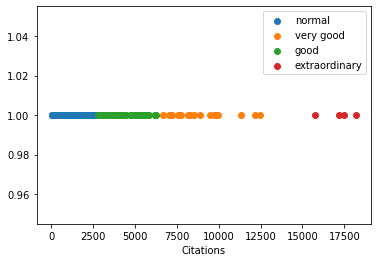

In [40]:
#plhrofories gia clusters (proeretiko)

print(df.groupby("new").describe()["C"])
grades = ["normal","very good","good", "extraordinary"]

for i in range(4):
    filt = df["new"]==i
    plt.scatter(df[filt]["C"],[1 for i in range(len(df[filt]))],label= grades[i])
    
plt.xlabel("Citations")
plt.legend()
plt.show()    

In [41]:
#ypologizei toys mesoys orous kathe xronias enos cluster

def cluster_centers_def(c_or_p,i):
    # gia meleti ana xrono
    if c_or_p=="P":
        start = "2021.1"
    else:
        start = "2021.2"
    filt = ((df["age"]>30)  & (df["C"]<30000) & (df["new"]==i))

    dfc = df[filt].loc[:,start:"1981.2":2]
# 

    for column in dfc:
        dfc[column] = pd.to_numeric(dfc[column], errors="coerce")
    dfc = dfc.fillna(0)    
    
    dba_km = TimeSeriesKMeans(n_clusters=1,
                              n_init = 100,
                              max_iter_barycenter=100
                              )
    filt= (df["new"]==i)
    X=dfc[filt]
    y_pred = dba_km.fit_predict(X)

    cluster_centers = dba_km.cluster_centers_
    print(    cluster_centers)
    return cluster_centers







In [42]:
cluster_centers= [ ]


for i in range(clusters):
   cluster_centers.append(cluster_centers_def("C",i))
    
    
    

C:\Users\chick\AppData\Local\Temp/ipykernel_15640/1382982304.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X=dfc[filt]


[[[6.2744e+01]
  [6.7168e+01]
  [6.6008e+01]
  [6.6488e+01]
  [6.2016e+01]
  [6.3536e+01]
  [6.3560e+01]
  [6.1592e+01]
  [5.7544e+01]
  [5.2752e+01]
  [4.9616e+01]
  [4.6728e+01]
  [4.2656e+01]
  [3.9688e+01]
  [3.6024e+01]
  [3.3480e+01]
  [3.0120e+01]
  [2.6184e+01]
  [2.2440e+01]
  [2.0176e+01]
  [1.6664e+01]
  [1.6192e+01]
  [1.3112e+01]
  [1.2208e+01]
  [1.1864e+01]
  [1.0584e+01]
  [9.5520e+00]
  [8.6240e+00]
  [6.1440e+00]
  [5.4320e+00]
  [3.7440e+00]
  [2.3840e+00]
  [1.8880e+00]
  [1.6160e+00]
  [1.0720e+00]
  [6.4800e-01]
  [4.1600e-01]
  [1.3600e-01]
  [3.2000e-02]
  [4.0000e-02]
  [0.0000e+00]]]


C:\Users\chick\AppData\Local\Temp/ipykernel_15640/1382982304.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X=dfc[filt]


[[[416.7 ]
  [478.8 ]
  [482.2 ]
  [501.45]
  [490.95]
  [512.4 ]
  [503.45]
  [490.9 ]
  [475.65]
  [455.3 ]
  [421.95]
  [391.  ]
  [377.4 ]
  [332.15]
  [322.85]
  [311.65]
  [272.9 ]
  [235.9 ]
  [205.2 ]
  [173.85]
  [141.25]
  [110.45]
  [ 92.5 ]
  [ 81.9 ]
  [ 67.5 ]
  [ 59.35]
  [ 40.85]
  [ 33.45]
  [ 26.35]
  [ 18.05]
  [  8.  ]
  [  4.45]
  [  3.8 ]
  [  1.75]
  [  0.  ]
  [  0.  ]
  [  0.  ]
  [  0.  ]
  [  0.  ]
  [  0.  ]
  [  0.  ]]]


C:\Users\chick\AppData\Local\Temp/ipykernel_15640/1382982304.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X=dfc[filt]


[[[245.01960784]
  [280.8627451 ]
  [275.31372549]
  [269.80392157]
  [260.19607843]
  [258.19607843]
  [253.1372549 ]
  [260.01960784]
  [228.41176471]
  [216.62745098]
  [192.82352941]
  [187.23529412]
  [172.23529412]
  [156.09803922]
  [154.19607843]
  [137.58823529]
  [115.21568627]
  [ 99.98039216]
  [ 85.15686275]
  [ 63.70588235]
  [ 56.23529412]
  [ 47.84313725]
  [ 41.56862745]
  [ 36.17647059]
  [ 31.70588235]
  [ 26.15686275]
  [ 19.52941176]
  [ 17.2745098 ]
  [ 12.33333333]
  [  9.19607843]
  [  6.35294118]
  [  5.49019608]
  [  3.60784314]
  [  2.82352941]
  [  2.80392157]
  [  1.45098039]
  [  1.11764706]
  [  0.47058824]
  [  0.37254902]
  [  0.31372549]
  [  0.        ]]]
[[[903.5 ]
  [958.75]
  [936.  ]
  [923.5 ]
  [955.25]
  [969.75]
  [937.25]
  [922.25]
  [851.25]
  [765.  ]
  [780.75]
  [739.  ]
  [756.5 ]
  [645.5 ]
  [625.75]
  [551.  ]
  [558.25]
  [429.  ]
  [356.25]
  [286.5 ]
  [251.  ]
  [221.5 ]
  [224.  ]
  [208.5 ]
  [151.  ]
  [169.75]
  [134.75]
  [1

C:\Users\chick\AppData\Local\Temp/ipykernel_15640/1382982304.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X=dfc[filt]


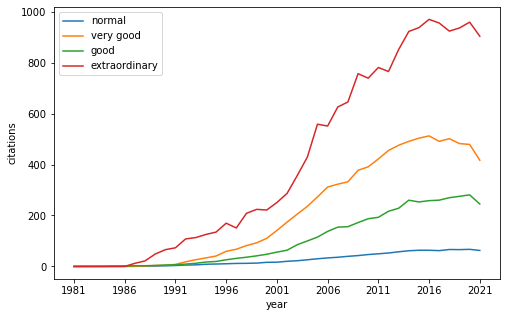

In [43]:
#apeikonishs meswn orwn kathe xronias kathe cluster

fig = plt.figure(figsize = (8,5))
for i in range(clusters):
    plt.plot(cluster_centers[i].ravel()[::-1],label = grades[i])
plt.xticks(ticks = [i for i in range(0,41,5)],labels= [i for i in range(1981,2022,5)])
plt.ylabel("citations")
plt.xlabel("year")
plt.legend()  

plt.savefig("cluster_centers.png")
plt.show()    

In [44]:
#epistrefei dusdiastato pikana me ta timeseries C (oles tis eggrafes)
def timseries_cit():
    # gia meleti ana xrono
    dfc = df.loc[:,"2021.2":"1981.2":2]
# 

    for column in dfc:
        dfc[column] = pd.to_numeric(dfc[column], errors="coerce")
    
    np_arrayc = dfc.to_numpy()
    np_arrayc = np.nan_to_num(np_arrayc)

    return np_arrayc


cit_array= timseries_cit()


cit_array= np.nan_to_num(cit_array, copy=True, nan=0, posinf=None, neginf=None)
#centered moving average
cit_array_copy= cit_array.copy() 
for i in range(len(cit_array)):
    for j in range(1,len(cit_array[i])-1):
         cit_array[i][j]= (cit_array_copy[i][j-1] + cit_array_copy[i][j] + cit_array_copy[i][j+1])/3

          


In [45]:
# upologismos apostasewn timeseries apo cluster centers

clusters=[]

#pleonektima xronwn
advantage = 10


for row in range(len(cit_array)):
    distances = []
    age=  df["age"][row]
    if age<=30 :
        for cluster in cluster_centers:

            distances.append(np.linalg.norm(cit_array[row][age:0:-1]-cluster.ravel()[40-advantage:40-advantage-age:-1]) )
#             print(cluster.ravel()[40-advantage:40-advantage-age-1:-1])
        cluster = min(distances) 
        clusters.append(distances.index(cluster))
    else: 
        clusters.append(df['new'][row])
df['Performance']= clusters    

In [46]:
filt = ((df["age"]>15))

df[filt].groupby("Performance").describe()["C"]

,count,mean,std,min,25%,50%,75%,max
Performance,,,,,,,,
0.0,493.0,769.081136,633.407912,0.0,269.00,583.0,1151.00,2702.0
1.0,84.0,6222.309524,2504.004354,1936.0,4257.75,6189.0,7717.00,12439.0
2.0,197.0,2805.233503,1445.139820,676.0,1590.00,2544.0,3708.00,6271.0
3.0,32.0,12378.312500,6028.307452,3965.0,7720.50,10674.5,16284.25,25718.0


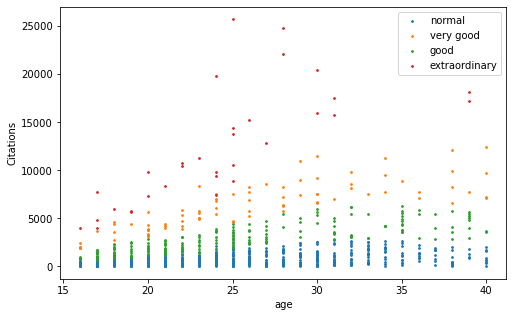

In [47]:
# optikopoihsh katigoriopoihshs
fig = plt.figure(figsize = (8,5))
for i in range(4):
    filt= ((df["Performance"]==i) & (df["age"]>15))
    plt.scatter(df[filt]['age'],df[filt]['C'],s=3,label = grades[i])
plt.xlabel("age")
plt.ylabel("Citations")
plt.legend()  
plt.savefig("cluster_results.png")
plt.show()